In [ ]:
!pip install transformers
!pip install sentence-transformers
!pip install pytorch-crf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 13.5 MB/s 
     |████████████████████████████████| 7.6 MB 61.3 MB/s 
     |████████████████████████████████| 182 kB 58.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 1.3 MB 43.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=cf71f177241d47be40cd44fd51f178d1fef08aae1f669739c62282ca656f6129
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


to do:



*   random embeddings then lstm
*   bert embeddigns to sentnece embeddigns by avg then lstm
*   legal bert embeddings to sentence embeddings by avg then lstm
*   sbert then lstm





In [ ]:
!cp /content/drive/MyDrive/IRE_Project/dev.json .
!cp /content/drive/MyDrive/IRE_Project/train.json .

In [ ]:
import json
import numpy as np

final_text = []
final_labels = []

label_to_num_dict = {'ISSUE':0, 'RLC':1, 'RATIO':2, 'STA':3, 'PRE_NOT_RELIED':4, 'ANALYSIS':5, 'PREAMBLE':6, 'ARG_PETITIONER':7, 'ARG_RESPONDENT':8, 'FAC':9, 'NONE':10, 'RPC':11, 'PRE_RELIED':12}
with open('train.json') as f:
    # print(f)
    # for dict_obj in f:
    data = json.load(f)
    # print(data)


    for dict_obj in data:
        label_list = []
        text_list = []
        # print(type(dict_obj))

        for annotations_dict in dict_obj['annotations']:
            for result_dict in annotations_dict['result']:
                # if(len(result_dict['value']['labels'])) > 1:
                text_list.append(result_dict['value']['text'])

                label_list.append(label_to_num_dict[result_dict['value']['labels'][0]])
        final_text.append(text_list)
        final_labels.append(label_list)


X_train = final_text
Y_train = np.array(final_labels)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
import json
import numpy as np

final_text = []
final_labels = []

label_to_num_dict = {'ISSUE':0, 
                     'RLC':1, 
                     'RATIO':2, 
                     'STA':3, 
                     'PRE_NOT_RELIED':4, 
                     'ANALYSIS':5, 
                     'PREAMBLE':6, 
                     'ARG_PETITIONER':7, 
                     'ARG_RESPONDENT':8, 
                     'FAC':9, 
                     'NONE':10, 
                     'RPC':11, 
                     'PRE_RELIED':12}
with open('dev.json') as f:
    # print(f)
    # for dict_obj in f:
    data = json.load(f)
    # print(data)


    for dict_obj in data:
        label_list = []
        text_list = []
        # print(type(dict_obj))

        for annotations_dict in dict_obj['annotations']:
            for result_dict in annotations_dict['result']:
                # if(len(result_dict['value']['labels'])) > 1:
                text_list.append(result_dict['value']['text'])

                label_list.append(label_to_num_dict[result_dict['value']['labels'][0]])
        final_text.append(text_list)
        final_labels.append(label_list)



# print(len(text_list),len(label_list))
# len_train = len(label_list)

# for i in range(len_train):
#     label_list[i] = label_to_num_dict[label_list[i]]
    # print(label_list[i])

# Convert label to one-hot representation
# temp = []
# for i in range(len_train):
#     temp.append(tf.keras.utils.to_categorical(label_list[i], num_classes=13))
    
# Y_train = np.array(temp)


# print(label_list)
# set_label_list = set(label_list)

X_test = final_text
Y_test = np.array(final_labels)

# print(set_label_list)

# print(Y_train)       





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
print(len(X_train[0]))


91


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")

model = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
# tokenizer.to(device)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/222k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at nlpaueb/legal-bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [ ]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

import torch
def enco(document):
    doc_embed = []
    for sentence in document:
        encoded_input = tokenizer(sentence, padding=True, truncation=True, return_tensors='pt')
        encoded_input.to(device)
        # print(encoded_input)

        with torch.no_grad():
            model_output = model(**encoded_input) # Models outputs are now tuples
        sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
        doc_embed.append(sentence_embeddings.cpu().numpy())
        # sentence_embeddings.to(device)
    # print(doc_embed)
    doc_embed = torch.tensor(doc_embed)
    doc_embed = doc_embed.to(device)
    return doc_embed

In [ ]:
# enco(["Suyash rocks"]).shape

In [ ]:
import torch
class Corpus(torch.utils.data.Dataset):
  def __init__(self, documents, sentence_labels):
    self.documents = documents
    self.sentence_labels = sentence_labels
  
  def __len__(self):
    return(len(self.sentence_labels))
  
  def __getitem__(self, idx):
    doc = self.documents[idx]
    sentence_labels = self.sentence_labels[idx]
    return doc, sentence_labels

In [ ]:
# # Bert layers
# import torch.nn as nn

# class Model(nn.Module):

#   def __init__(self, num_classes = 13):
#     super(Model, self).__init__()
#     self.fc = nn.Linear(768, 300)
#     self.output = nn.Linear(300, num_classes)
#     self.dropout = nn.Dropout(p=0.2)
#     self.relu = nn.ReLU
#     pass

#   def forward(self,x):
#     # print(x)
#     sentence_embedding = enco(x)
#     x = self.fc(sentence_embedding)
#     re = self.relu(x)
#     x=self.dropout(x)

#     x = self.output(x)
#     return x

#bilstm layers

import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torchcrf import CRF

class BiLSTM_basic(nn.Module):

    def __init__(self, embedding_dim=768, hidden_dim=300, output_size=13):
        super(BiLSTM_basic, self).__init__()
        
        # 1. Embedding Layer
        # if embeddings is None:
        #     self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        # else:
        # self.embeddings = nn.Embedding.from_pretrained(embeddings)
        
        # 2. LSTM Layer
        #embedding dimension must be equal to bert embeddings
        #use of 'batch_first=true'?
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, num_layers=1, batch_first=False)
        
        # 3. Optional dropout layer
        self.dropout_layer = nn.Dropout(p=0.3)

        # 4. Dense Layer ?? 
        self.hidden2tag = nn.Linear(2*hidden_dim, output_size)

        self.relu=nn.ReLU

        self.hidden_dim = hidden_dim

        self.crf_model = CRF(output_size)
    
    def generate_emissions(self, batch_text):
        hidden_layer = self.init_hidden(len(batch_text))

        embeddings = enco(batch_text)

        # x_packed = pack_padded_sequence(embeddings, batch_first = True)
        
        # packed_seqs = pack_padded_sequence(embeddings, batch_length)
        print(embeddings.shape)
        lstm_output, _ = self.lstm(embeddings, hidden_layer)
        print(lstm_output.shape)
        # lstm_output, _ = pad_packed_sequence(lstm_output)

        # self.relu(lstm_output)
        # lstm_output, op_lengths = pad_packed_sequence(lstm_output, batch_first = True)

        lstm_output = self.dropout_layer(lstm_output)
        print(lstm_output.shape)

        emissions = self.hidden2tag(lstm_output)
        # emissions = torch.squeeze(emissions)
        # emissions = emissions.unsqueeze(0)

        return emissions
        
    def loss(self, batch_text, batch_label):
        # print(len(batch_text))

        # hidden_layer = self.init_hidden(len(batch_text))

        # embeddings = enco(batch_text)

        # # x_packed = pack_padded_sequence(embeddings, batch_first = True)
        
        # # packed_seqs = pack_padded_sequence(embeddings, batch_length)
        # lstm_output, _ = self.lstm(embeddings, hidden_layer)
        # print(lstm_output.shape)
        # # lstm_output, _ = pad_packed_sequence(lstm_output)

        # # self.relu(lstm_output)
        # # lstm_output, op_lengths = pad_packed_sequence(lstm_output, batch_first = True)

        # lstm_output = self.dropout_layer(lstm_output)
        # print(lstm_output.shape)

        emissions = self.generate_emissions(batch_text)
        batch_label = batch_label.unsqueeze(1)
        # print(logits.shape)
        loss = -self.crf_model(emissions, batch_label)

        return loss
    
    def predict(self, batch_text):
        emissions = self.generate_emissions(batch_text)
        # print(logits.shape)
        label = self.crf_model.decode(emissions)
        return label
    
    def init_hidden(self, batch_size):
        return (torch.randn(2, 1, self.hidden_dim).to(device), torch.randn(2, 1, self.hidden_dim).to(device))

In [ ]:
from torch.utils.data import DataLoader
classification_model = BiLSTM_basic()
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
classification_model.to(device)
# criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classification_model.parameters(), lr=0.01)

dataset = Corpus(X_train, Y_train)
DL_DS = DataLoader(dataset, batch_size = 1)
classification_model.train()

BiLSTM_basic(
  (lstm): LSTM(768, 300, bidirectional=True)
  (dropout_layer): Dropout(p=0.3, inplace=False)
  (hidden2tag): Linear(in_features=600, out_features=13, bias=True)
  (crf_model): CRF(num_tags=13)
)

In [ ]:
for epoch in range(6):
  curr_loss = 0
  for idx, (x,y) in enumerate(DL_DS):
    print(x)
    print(len(x))
    break
    if(len(x)==0):
      print("Ma ka bhosra")
      continue
    optimizer.zero_grad()
    # x = enco(x)
    # print(x)
    y=torch.tensor(y)
    y=y.to(device)
    loss = classification_model.loss(x, y)
    # label.to(device)
    # label=torch.squeeze(label)
    # loss = criterion(label, y)
    loss.backward()
    optimizer.step()
    print(loss.item())
    curr_loss+=loss.item()
  print(f"Epoch -> {epoch} Loss -> {curr_loss}")

[('      IN THE HIGH COURT OF KARNATAKA,\n          CIRCUIT BENCH AT GULBARGA\n\nDATED THIS THE 22ND DAY OF FEBRUARY, 2013',), ("\n\n      BEFORE\n\nTHE HON'BLE MR.JUSTICE ANAND BYRAREDDY\n\n      CRIMINAL APPEAL NO.3532 OF 2012\n\nBETWEEN:                                            R\n\nBabu S/o Siddappa,                         .. APPELLANT\nAge: 30 Years, Occ: Household,\nR/o: Sunthan Village,\nTaluk Chincholi,\nDistrict Gulbarga.\n\n(By Shri Ishwar Raj S.Chowdapur, Advocate)\n\nAND:\n\nThe State of Karnataka                     .. RESPONDENT\n(Through Ratkal Police Station)\nRepresented by Additional State\nPublic Prosecutor, Circuit Bench,\nGulbarga.\n\n(By Shri S.S.Aspalli, Government Pleader)\n\n       ",), ('This Criminal Appeal is filed under Section 374(2) of the\nCode of Criminal Procedure, 1973 by the advocate for the\nappellant praying to set aside the order of conviction and\n\nsentence in S.C.No.232/2008 on the file of the II Additional\nSessions Judge, Gulbarga and acqu

In [ ]:
with open("model_file", "wb") as f:
  torch.save(classification_model, f)
  

In [ ]:
y_pred_list = []
with torch.no_grad():
  classification_model.eval()
  for idx in range(len(X_test)):
    x = X_test[idx]
    print(x)
    break
    y_test_pred = classification_model.predict(x)
    # print(y_test_pred)
    # print(len(y_test_pred[0]))
    # print(y_test_pred)
    # y_test_pred = torch.squeeze(y_test_pred)
    # _, y_pred_tags = torch.max(y_test_pred, dim = 1)
    y_pred_list.append(y_test_pred[0])
  print(y_pred_list)

y_pred_list = [a for a in y_pred_list]

['PETITIONER:\nTHE COMMISSIONER OF INCOME-TAXNEW DELHI\n\nVs.\n\nRESPONDENT:\nM/s. CHUNI LAL MOONGA RAM', '\n\nDATE OF JUDGMENT:\n05/05/1961\n\nBENCH:\nDAS, S.K.', '\nBENCH:\nDAS, S.K.\nHIDAYATULLAH, M.\nSHAH, J.C.\n\nCITATION:            1962 SCR (2) 823\n 1962 AIR 1272\n\nACT:\nExcess Profits Tax-Income-Assesseecarrying on business in\ntaxable territory-Losses incurred in transactionsin non-\ntaxable territory-If allowable in computing income-Excess\nProfits Tax Act, 1940 (15 of 1940), s. 5.\n\nHEADNOTE:\nDuring the assessment year 1946-47, the assessee was\ncarrying on speculative business in bullion at Delhi.', 'It\nentered into transactions in the nature of forward\ntransactions with parties at Bhatinda (in the Patiala State\noutside the taxable territories of British India) in which\nit suffered losses.', 'The assessee claimed deduction of these\nlosses in the computation of its income.', 'Held, that the losses incurred in Bhatinda could not be\ntaken into account in computing th

In [ ]:
# print(len(y_pred_list))
# print(len(y_pred_list[0]))
y_pred_list = y_pred_list
y_pred_list = [item for sublist in y_pred_list for item in sublist]
# y_pred_list = y_pred_list.flatten()
# Y_test = Y_test.flatten()
# print(Y_test)
print(y_pred_list)
print(len(y_pred_list))

[6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

In [ ]:
Y_test = [item for sublist in Y_test for item in sublist]
print(len(Y_test))

TypeError: ignored

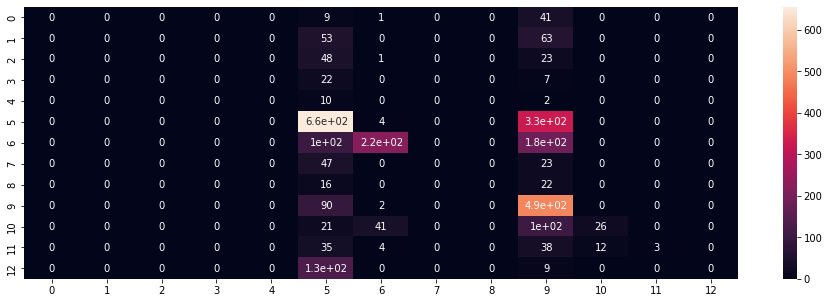

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
confusion_matrix_df = pd.DataFrame(confusion_matrix(Y_test, y_pred_list)).rename(columns=label_to_num_dict, index=label_to_num_dict)

sns.heatmap(confusion_matrix_df, annot=True)
plt.savefig("foo.png")

In [ ]:
print(classification_report(Y_test, y_pred_list))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.00      0.00      0.00       116
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        12
           5       0.53      0.66      0.59       986
           6       0.81      0.44      0.57       509
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00        38
           9       0.37      0.84      0.51       581
          10       0.68      0.14      0.23       192
          11       1.00      0.03      0.06        92
          12       0.00      0.00      0.00       142

    accuracy                           0.48      2890
   macro avg       0.26      0.16      0.15      2890
weighted avg       0.47      0.48      0.42      2890



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
